# TEXT MINING for PRACTICE: TF-IDF
---

# 1. TF-IDF

In [3]:
docs = [
    "I love bitcoin and money.",
    "Bitcoin is the future of the currency.",
    "My friend made money from bitcoin"
]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
matrix = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
matrix

['bitcoin', 'currency', 'friend', 'future', 'love', 'money']


,bitcoin,currency,friend,future,love,money
0,0.425441,0.000000,0.000000,0.000000,0.720333,0.547832
1,0.385372,0.652491,0.000000,0.652491,0.000000,0.000000
2,0.425441,0.000000,0.720333,0.000000,0.000000,0.547832


In [6]:
for i, doc in enumerate(docs):
    features = vectorizer.get_feature_names()
    print('문서', i, matrix.loc[i].idxmax())

문서 0 love
문서 1 currency
문서 2 friend


# 2. TF-IDF 직접 구현해보기

In [7]:
text ="그녀는 행복한 비트코인을 사면서 울고 있지 않다"

## 2-1. 형태소 분석기 선택

In [8]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
okt = Okt()
kkma = Kkma()
#Q. 트위터 분석기 써보기
print("트위터 분석기:", None)
#Q. 꼬꼬마 분석기 써보기
print("꼬꼬마 분석기:", None)



트위터 분석기: None
꼬꼬마 분석기: None


/Users/seojungwon/anaconda3/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


## 2-2. 데이터 및 불용어 리스트 로딩

In [9]:
import csv

In [10]:
contents = []
with open('data/article_sample.txt', encoding="utf-8") as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        #0: 토픽, 1: 출처, 2: 날짜, 3: 제목, 4: 내용 
        contents.append(row[4])      
contents[0]


'금융硏 비트코인 쇠락과 내재적 결함 보고서(지디넷코리아=손예술 기자)대표적인 암호화폐 비트코인의 가격이 급변동했음에도 불구, 일부 암호화폐 옹호론자들은 비트코인이 갖고 있는 몇 가지 결함이 해소되면 새로운 국면이 나타날 것으로 예측했다.그들은 이런 결함을 전제로 국내외 정부와 감독당국은 선제적으로 시각 및 규제 환경을 정비해야 한다는 주장하고 있다.14일 한국금융연구원은 비트코인 쇠락과 내재적 결함이란 보고서에서 암호화폐 옹호론자의 입장과 함께 그들이 제시한 세 가지 결함을 발표했다.여기서 암호화폐 옹호론자들은 암호화폐로 새로운 부가가치를 낼 수 있는 사업모델 등장 가능성에 집중하고 있는 인물들로 통칭된다.그러나 그들은 이를 위해서 비트코인이 세 가지 결함이 우선적으로 해소돼야 한다고 보고 있다.하나는 비트코인이 재화와 용역을 구입하는데 사용되는 시장이 아직은 너무 좁다는 것이다. 미국 비트코인 시장조사기관인 사토시 캐피탈 리서치에 따르면 지난 2017년 기준으로 비트코인을 사용한 거래 결제액은 약 24억달러로 중국의 알리페이와 위챗페이의 거래 결제액이 약 15조달러였음을 감안하면 지나치게 적은 시장이라는 것이다.두 번째는 비트코인은 거래 건수 급증과 블록 용량 제한 등으로 채굴을 통핸 결제 처리가 지연돼, 이용자들이 거래 완료를 위해 부담해야 하는 수수료가 높아지는 문제가 있다는 것이다. 비트코인 기반 기술인 블록체인을 구성하는 각 블록 용량은 1메가바이트로 이뤄져 있고 초당 평균 거래 처리 건수는 7건이며 약 10분마다 1개 블록이 형성된다. 반면 비자의 경우 초당 거래 처리 건수는 수 만건에 달한다.세 번째로 거래소 해킹 등과 같은 사기성 거래에 아직도 노출돼 있다는 점이다. 지난 2월 캐나다 암호화폐 거래소 쿼드리가CX대표이사이자 설립자는 사망과 거액의 고객 암호화폐 분시로 파산 보호를 신청했으며 3월 파산관재인 은 비밀키를 관리했던 설립자 사망 이전 8개월 간 핫월렛에 고객의 암호화폐가 없었다고 발표했다. 핫월렛은 인터넷과 연결돼 있는 암호화폐 전자

In [11]:
stops_words = []
with open('data/stopword.txt', encoding="utf-8") as f:
    for line in f.readlines():
        stops_words.append(line.strip())
stops_words

['은', '는', '이', '가', '것', '등', '고', '중']

## 2-3. 형태소 분석후 명사만 추출, 불용어 제거

In [12]:
POS_LIST = ["Noun"]
tokenized_sentence_list = []
for content in contents:
    tokens = []
    for pos in okt.pos(content):
        #Q Condition 부분을 완성하시오
        condition = pos[1] in POS_LIST and pos[0] not in stops_words
        if condition:
            tokens.append(pos[0])
    tokenized_sentence_list.append(tokens)

tokenized_sentence_list[:10]

[['금융',
  '비트코인',
  '쇠락',
  '재적',
  '결함',
  '보고서',
  '넷',
  '코리아',
  '손',
  '예술',
  '기자',
  '대표',
  '암호',
  '화폐',
  '비트코인',
  '가격',
  '급',
  '변동',
  '불구',
  '일부',
  '암호',
  '화폐',
  '옹호',
  '론자',
  '비트코인',
  '몇',
  '가지',
  '결함',
  '해소',
  '국면',
  '예측',
  '그',
  '결함',
  '전제',
  '국내외',
  '정부',
  '감독',
  '당국',
  '선제',
  '시각',
  '및',
  '규제',
  '환경',
  '정비',
  '주장',
  '한국',
  '금융',
  '연구원',
  '비트코인',
  '쇠락',
  '재적',
  '결함',
  '보고서',
  '암호',
  '화폐',
  '옹호',
  '론',
  '입장',
  '그',
  '제시',
  '세',
  '가지',
  '결함',
  '발표',
  '여기',
  '암호',
  '화폐',
  '옹호',
  '론자',
  '암호',
  '화폐',
  '부가가치',
  '낼',
  '수',
  '사업',
  '모델',
  '등장',
  '가능성',
  '집중',
  '인물',
  '통칭',
  '그',
  '위해',
  '비트코인',
  '세',
  '가지',
  '결함',
  '우선',
  '해소',
  '보고',
  '하나',
  '비트코인',
  '재화',
  '용역',
  '구입',
  '사용',
  '시장',
  '미국',
  '비트코인',
  '시장조사',
  '기관',
  '사토시',
  '캐피탈',
  '리서치',
  '지난',
  '기준',
  '비트코인',
  '사용',
  '거래',
  '결제',
  '액',
  '약',
  '중국',
  '알리페',
  '위챗',
  '페이',
  '거래',
  '결제',
  '액',
  '약',
  '감안',
  '시장',
  '두',
  '번

## 2-4. 단어 중복 제거

In [14]:
unique_terms = []
for tokenized_sentence in tokenized_sentence_list:
    unique_terms += tokenized_sentence
print("중복 제거 전: ", len(unique_terms))
#Q. List에서의 중복 제거를 하는 방법은?
unique_terms= list(set(unique_terms))

print("중복 제거 후: ", len(unique_terms))
unique_terms = sorted(unique_terms)
unique_terms[:10]

중복 제거 전:  27912
중복 제거 후:  3486


['가감', '가게', '가격', '가계', '가계부채', '가구', '가까이', '가늠', '가능', '가능성']

## 2-5. Matrix로 표현 (행: 문서번호, 열: 단어)

In [15]:
import numpy as np
import pandas as pd

In [16]:
# 매트릭스 초기화
tf_matrix = np.zeros((len(tokenized_sentence_list), len(unique_terms)))
print(tf_matrix.shape)
print(tf_matrix)

(100, 3486)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 2-6. TF 매트릭스 표현

In [17]:
# 해당하는 단어 카운팅
for row_n, tokenized_sentence in enumerate(tokenized_sentence_list):
    for token in tokenized_sentence:
        col_n = unique_terms.index(token)
        tf_matrix[row_n,col_n]+=1
        
tf_matrix

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# Pandas 데이터 프레임으로 표현하기
tf_matrix_origin = pd.DataFrame(data=tf_matrix,columns=unique_terms)  # 1st row as the column names

In [19]:
tf_matrix_origin

,가감,가게,가격,가계,가계부채,가구,가까이,가늠,가능,가능성,...,흐름,흑심,흡수,흥,흥미,희망,희비,희화,히트맵,힘
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Q. 정규화 term(t,d) = term(t,d)/N(d)
tf_matrix = tf_matrix_origin.div(tf_matrix_origin.sum(axis=1), axis=0)

In [21]:
# 정규화된 TF matrix
tf_matrix

,가감,가게,가격,가계,가계부채,가구,가까이,가늠,가능,가능성,...,흐름,흑심,흡수,흥,흥미,희망,희비,희화,히트맵,힘
0,0.0,0.0,0.002924,0.000000,0.0,0.0,0.000000,0.002924,0.000000,0.002924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.004717,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.011905,0.000000,0.0,0.0,0.001701,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.014851,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.009901,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.006562,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.001312,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.008333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 2-7. DF 매트릭스 표현

In [25]:
# #d(t), 특정 단어가 몇개의 문서에 등장했나?
df_matrix = (tf_matrix_origin>0).sum(axis=0)
df_matrix

가감       8
가게       1
가격      24
가계      15
가계부채     2
가구       1
가까이      3
가늠       1
가능       5
가능성     23
가량       5
가로       1
가명       2
가물       1
가산      17
가산금      8
가상      10
가상화      1
가세       1
가속       1
가야       1
가운데     21
가을       2
가의       3
가이드      1
가인       1
가입       1
가장      28
가정       2
가족       1
        ..
회의론자     1
회장       5
획득       1
획일       1
횡령       1
횡령죄      1
횡보       1
횡보하      1
효과      20
효성       1
효율       4
후       17
후계       1
후반       1
후보       1
후손       1
후회       2
훗날       1
훼손       3
휘장       1
흐름       2
흑심       1
흡수       2
흥        1
흥미       1
희망       1
희비       1
희화       1
히트맵      1
힘        4
Length: 3486, dtype: int64

In [26]:
df_matrix.sort_values(ascending=False)[:10]

금융    97
기자    93
수     70
은행    64
시장    61
대출    59
기준    56
말     56
및     52
당국    50
dtype: int64

In [27]:
df_matrix.sort_values(ascending=True)[:10]

십자군    1
소문     1
최씨     1
최우영    1
소규모    1
최저     1
소      1
최적     1
센티     1
최종인    1
dtype: int64

In [28]:
tf_matrix_origin.shape[0]

100

## 2-8. IDF 매트릭스 계산

In [29]:
#idf(t) = log(N/(df + 1))
N = tf_matrix_origin.shape[0]
idf_matrix = np.log(N/df_matrix+1)

In [30]:
idf_matrix

가감      2.602690
가게      4.615121
가격      1.642228
가계      2.036882
가계부채    3.931826
가구      4.615121
가까이     3.536117
가늠      4.615121
가능      3.044522
가능성     1.676690
가량      3.044522
가로      4.615121
가명      3.931826
가물      4.615121
가산      1.928961
가산금     2.602690
가상      2.397895
가상화     4.615121
가세      4.615121
가속      4.615121
가야      4.615121
가운데     1.751268
가을      3.931826
가의      3.536117
가이드     4.615121
가인      4.615121
가입      4.615121
가장      1.519826
가정      3.931826
가족      4.615121
          ...   
회의론자    4.615121
회장      3.044522
획득      4.615121
획일      4.615121
횡령      4.615121
횡령죄     4.615121
횡보      4.615121
횡보하     4.615121
효과      1.791759
효성      4.615121
효율      3.258097
후       1.928961
후계      4.615121
후반      4.615121
후보      4.615121
후손      4.615121
후회      3.931826
훗날      4.615121
훼손      3.536117
휘장      4.615121
흐름      3.931826
흑심      4.615121
흡수      3.931826
흥       4.615121
흥미      4.615121
희망      4.615121
희비      4.615121
희화      4.6151

In [31]:
idf_matrix.sort_values(ascending=True)[:10]

금융    0.708493
기자    0.730091
수     0.887303
은행    0.940983
시장    0.970531
대출    0.991367
말     1.024504
기준    1.024504
및     1.072637
를     1.098612
dtype: float64

In [32]:
print(tf_matrix.shape)
print(idf_matrix.shape)

(100, 3486)
(3486,)


## 2-9. TF-IDF 매트릭스 계산

In [33]:
# tf-idf(t, d) = tf(t, d) * log(N/(df + 1))
tf_idf_matrix = tf_matrix * idf_matrix

In [34]:
tf_idf_matrix

,가감,가게,가격,가계,가계부채,가구,가까이,가늠,가능,가능성,...,흐름,흑심,흡수,흥,흥미,희망,희비,희화,히트맵,힘
0,0.0,0.0,0.004802,0.000000,0.0,0.0,0.000000,0.013495,0.000000,0.004903,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.007746,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.019550,0.000000,0.0,0.0,0.006014,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.024390,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.016601,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.010776,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002200,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.013972,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
for i in range(0,20):
    print("문서",i)
    print("TF: ",tf_matrix.loc[i].idxmax())
    print("TF-IDF: ",tf_idf_matrix.loc[i].idxmax())
    print("-"*10)

문서 0
TF:  비트코인
TF-IDF:  결함
----------
문서 1
TF:  비트코인
TF-IDF:  퍼거슨
----------
문서 2
TF:  비트코인
TF-IDF:  스테판
----------
문서 3
TF:  비트코인
TF-IDF:  비트코인
----------
문서 4
TF:  비트코인
TF-IDF:  팍스
----------
문서 5
TF:  비트코인
TF-IDF:  비트코인
----------
문서 6
TF:  비트코인
TF-IDF:  비트코인
----------
문서 7
TF:  금융
TF-IDF:  디지털
----------
문서 8
TF:  비트코인
TF-IDF:  비트코인
----------
문서 9
TF:  비트코인
TF-IDF:  콘스탄티노플
----------
문서 10
TF:  비트코인
TF-IDF:  대변인
----------
문서 11
TF:  출금
TF-IDF:  플러그
----------
문서 12
TF:  비트코인
TF-IDF:  버핏
----------
문서 13
TF:  금융
TF-IDF:  디지털
----------
문서 14
TF:  암호
TF-IDF:  광고
----------
문서 15
TF:  가상
TF-IDF:  가상
----------
문서 16
TF:  비트코인
TF-IDF:  유대인
----------
문서 17
TF:  비트코인
TF-IDF:  비트코인
----------
문서 18
TF:  비트코인
TF-IDF:  시세
----------
문서 19
TF:  스타벅스
TF-IDF:  스타벅스
----------


In [36]:

A = pd.DataFrame(np.ones((1,3)))
B = pd.Series([1,2,3])
print(A.shape)
print(B.shape)

(1, 3)
(3,)


In [37]:
A*B

,0,1,2
0,1.0,2.0,3.0


# 3. Zipf's Laws 확인해보기

In [38]:
words = tf_matrix_origin.sum().sort_values(ascending=False)[:100]

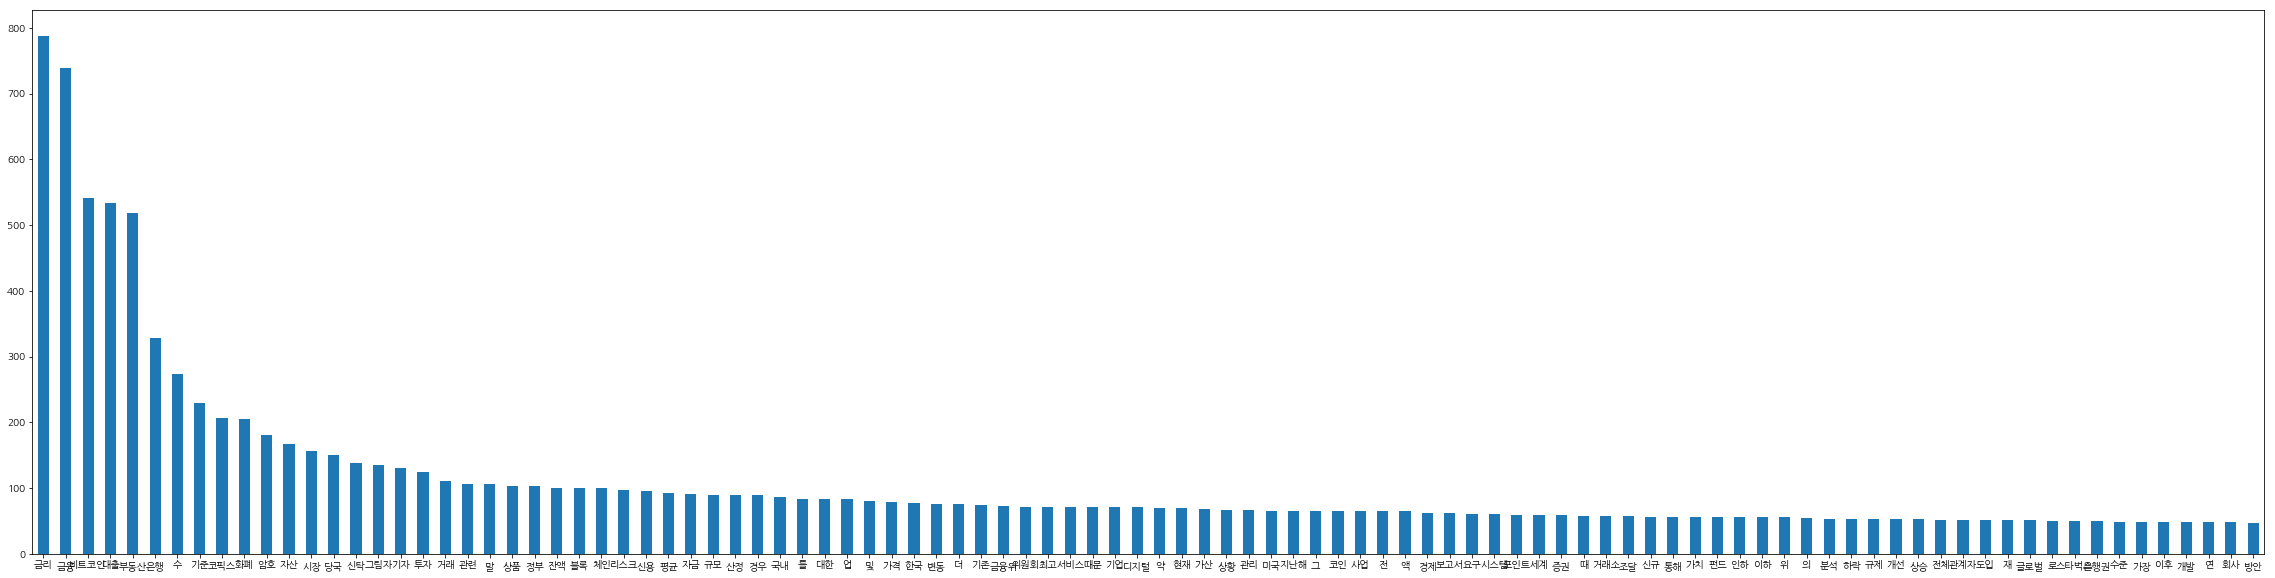

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
ax = words.plot.bar(x='word', y='tf', rot=0,figsize=(40, 10))